# **TP03 - Regresión Logística**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/enunciado.png?raw=true" alt="Descripción de la imagen">
</p>

## **Análisis**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/ej1_.png?raw=true" alt="Descripción de la imagen">
</p>

### **Regresión Logística**

La **regresión logística** es un modelo de clasificación utilizado principalmente para problemas donde la variable de salida es binaria. Se basa en la regresión lineal, pero en lugar de predecir valores continuos, aplica la función sigmoide para convertir la salida en una probabilidad comprendida entre 0 y 1.  

El modelo se define como:  

$$
P(y=1 | x) = \sigma (w^T x + b) =\frac{1}{1 + e^{-(w^T x + b)}} = p
$$

donde:  

- $ P(y=1 | x) $ representa la probabilidad de que la clase sea 1 dado un vector de entrada $ x $.  
- $ w $ es el vector de pesos del modelo.  
- $ b $ es el sesgo (bias).  
- La función sigmoide $ \sigma(z) = \frac{1}{1 + e^{-z}} $ transforma la salida de la combinación lineal en un valor entre 0 y 1.  

---

### **Cálculo de la inversa $\sigma^{-1}(p)$ con $p \in (0,1)$**

Sabemos que:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = p
$$


Lo que queremos ahora, es encontrar una expresión para $z$ en función de p, es decir, $z = \sigma^{-1}(p)$.

Partimos de que:

$$
p = \frac{1}{1 + e^{-z}}
$$

Multiplicamos ambos miembros por $1 + e^{-z}$ y reordenamos la expresión:

$$
p \ (1+e^{-z}) = 1
$$

$$
p + p \ e^{-z} = 1
$$

$$
e^{-z} = \frac{1-p}{p}
$$


Aplicando logaritmo a ambos miembros:

$$
-z = ln\left( \frac{1-p}{p}  \right)
$$


Por último multiplicamos por $-1$ y obtenemos la expresión final:

$$
z = \sigma^{-1}(p) = -ln\left( \frac{1-p}{p}  \right)
$$

A $z$ se lo conoce como logit.

---

### **Cálculo de la derivada de $\sigma(z)$**

Nos piden calcular la derivada de la función sigmoide:

$$
\sigma'(z) = \frac{\text{d}}{\text{d} z} \left( \frac{1}{1 + e^{-z}} \right)
$$

Aplicando reglas de derivación, especificamente la regla del cociente, obtenemos lo siguiente:

$$
\sigma'(z) = \frac{0 \ \left(1+e^{-z} \right) + 1 \ \left( -e^{-z} \right) }{\left( 1 + e^{-z}  \right)^2}
$$

$$
\sigma'(z) = \frac{e^{-z}}{\left( 1 + e^{-z}  \right)^2}
$$


Ahora queremos expresar el resultado en función de $p$. Para ello partimos de que:

$$
p = \frac{1}{1+e^{-z}}
$$

$$
\Rightarrow \frac{1}{p} = 1 + e^{-z}
$$

Por lo tanto, reemplazando que $1+e^{-z} = \frac{1}{p}$ y que $e^{-z} = \frac{1}{p} - 1$, podemos obtener la siguiente expresión:

$$
\sigma'(z) = \frac{ \frac{1}{p} - 1 }{\left( \frac{1}{p} \right)^2}
$$

$$
\sigma'(z) = p \ (1-p)
$$


Por lo tanto la derivada de la función sigmoide en función de $p$ es la siguiente:

$$
\sigma'(z) = p \ (1-p)
$$

Este resultado es muy útil porque evita depender directamente de $z$ y solo usa $p$ que es la salida de la sigmoide.

---

### **Expresión analítica para la función costo y su gradiente**

Dado que estamos analizando un problema de clasificación binaria, la función costo que se utiliza es la función de costo de entropía cruzada que tiene la siguiente expresión:


### **1. Función de Costo**
La función de costo de la regresión logística es:

$$
J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \sigma(w^T X_i + b) + (1 - Y_i) \log (1 - \sigma(w^T X_i + b)) \right]
$$

donde:  
- $ n $ es el número de muestras.  
- $ Y_i $ es la etiqueta real de la muestra $ i $ ($ 0 $ o $ 1 $).  
- $ X_i $ es el vector de características de la muestra $ i $.  
- $ w $ es el vector de pesos.  
- $ b $ es el sesgo.  
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ es la función sigmoide.  

Esta función mide la diferencia entre la probabilidad predicha por el modelo y la etiqueta real.

---

### **2. Gradiente de la Función de Costo**
Para obtener el gradiente de la función costo, necesitamos calcular las derivadas parciales de $ J(w, b) $ respecto a $ w $ y $ b $.

Antes de obtener el gradiente, definimos algunas expresiones que nos serán útiles:

#### **a. Derivada de $\sigma$ con respecto a $w$**  

Aplicamos regla de la cadena:

$$
\frac{\partial}{\partial w} \sigma(w^T X_i + b) = X_i \sigma'(w^T X_i + b)
$$

#### **b. Derivada de $\sigma$ con respecto a $b$**

$$
\frac{\partial}{\partial b} \sigma(w^T X_i + b) = \sigma'(w^T X_i + b)
$$


Además, de los resultados previos, podemos decir que:

$$
\text{Si } \ \sigma(w^T X_i + b) = p_i \ \ \rightarrow \ \  \sigma'(w^T X_i + b) = p_i \ (1 - p_i)
$$

Por lo tanto, las derivadas parciales serán:

$$
\frac{\partial}{\partial w} \sigma(w^T X_i + b) = X_i \ p_i \ (1 - p_i)
$$

$$
\frac{\partial}{\partial b} \sigma(w^T X_i + b) = p_i \ (1 - p_i)
$$


Ahora si procedemos al calculo del gradiente de la función costo:

### **Derivada con respecto a $w$**


Derivamos la función de costo respecto a  $w$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{\sigma(w^T X_i + b)} \frac{\partial}{\partial w} \ \sigma(w^T X_i + b) - (1 - Y_i) \frac{1}{1 - \sigma(w^T X_i + b)} \frac{\partial}{\partial w} \ \sigma(w^T X_i + b) \right]
$$


Reemplazando los resultados previos para obtener una expresión simplificada en función de $p_i$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ \frac{1}{p_i} \  p_i \  (1 - p_i) \ X_i - (1 - Y_i) \  \frac{1}{1 - p_i} \ p_i \ (1 - p_i) X_i \right]
$$

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ (1 - p_i) \ X_i - (1 - Y_i) \  p_i \ X_i \right]
$$

Sacando factor común $X_i$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} X_i \ \left[ Y_i - Y_i \ p_i - \left( p_i - Y_i \ p_i \right) \right]
$$

Por lo que la expresión final queda como:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} X_i ( Y_i - p_i )
$$

---

### **Derivada con respecto a $ b $**


La deducción es similar:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{\sigma(w^T X_i + b)} \frac{\partial}{\partial b} \ \sigma(w^T X_i + b) - (1 - Y_i) \frac{1}{1 - \sigma(w^T X_i + b)} \frac{\partial}{\partial b} \ \sigma(w^T X_i + b) \right]
$$

Reescribiendo para que la expresión nos quede en función de $p_i$:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{p_i} \ p_i \ (1 - p_i) - (1 - Y_i) \frac{1}{1 - p_i} \ p_i \ (1 - p_i) \right]
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ (1 - p_i) - (1 - Y_i) \ p_i \right]
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - Y_i \ p_i - (p_i - Y_i \ p_i) \right]
$$

Por lo que la expresión queda de la siguiente manera:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - p_i \right]
$$

---

### **3. Resumen**

1. **Función costo:**  

   $$
   J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \sigma(w^T X_i + b) + (1 - Y_i) \log (1 - \sigma(w^T X_i + b)) \right]
   $$

2. **Gradientes:**  

   $$
   \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} ( \sigma(w^T X_i + b) - Y_i ) X_i
   $$

   $$
   \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T X_i + b) - Y_i)
   $$



## **Pre procesamiento**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/ej2.png?raw=true" alt="Descripción de la imagen">
</p>

In [10]:
import kagglehub
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.sparse.linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_curve, auc
from io import BytesIO
import requests

### **Descarga del dataset**

Para poder obtener el dataset, utilizamos la librería `kagglehub`. Ésta librería de Python nos permite acceder y descargar datasets de Kaggle de manera más sencilla, sin necesidad de autenticación manual ni de configurar credenciales. Basicamente, es una herramienta que nos facilita la descarga de datasets públicos directamente a nuestro entorno de trabajo sin tener que usar la API de Kaggle tradicional.

$$$$

Los datasets se descargan en el directorio de caché predeterminado. Por lo tanto si queremos cambiar el directorio podemos usar la siguiente linea:

`os.environ["KAGGLEHUB_CACHE"] = os.getcwd()`

Ésta línea de codigo configura el directorio actual como el directorio donde se descargarán los archivos de `kagglehub`.

Una vez configurado el directorio de descarga, utilizamos el comando `dataset_download()` de `kagglehub` especificando la ruta del dataset en `Kaggle`. En nuestro caso vamos a descargar el dataset "Cats and Dogs Classification Dataset", creado por Bhavik Jikadara, que contiene aproximadamente 25 mil imagenes, la mitad correspondientes a imágenes perros y la otra mitad son imágenes de gatos.

---

### **Lectura de los archivos**

Una vez descargado el dataset, vamos a crear dos listas, una llamada `images` donde se van a almacenar las imagenes correspondientes al dataset, y otra lista llamada `labels` donde se guardaran las etiquetas correspondientes, $0$ si es un gato y $1$ si es un perro. 

Luego recorriendo los archivos de las carpetas correspondientes a las imágenes de perros y gatos, vamos a realizar lo siguiente:

1. Con `image.open(file_path)` vamos a abrir la imágen correspondiente a `file_path`.
2. Con `convert('L')` se convierte la imágen a escala de grises.
3. Con `resize(target_size)` redimensionamos la escala según `target_size`, en nuestro caso queremos redimensionar la imágen a un tamaño de $16 x 16$.
4. Por último guardamos la imágen en `images` como una matriz de `Numpy` y en `labels` guardamos la etiqueta correspondiente.


Luego de leer todas las imágenes, elegimos 5 al azar y a lo mostramos en un plot. 

In [11]:
#cambio el directorio de descarga
os.environ["KAGGLEHUB_CACHE"] = os.getcwd()

#descargo el dataset
kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")


# Directorios de las imágenes
folders = [
    r"datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat",
    r"datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Dog"
]

# Lista para almacenar las imágenes
images = []
labels = []

# Tamaño deseado
target_size = (16, 16)

# Recorrer las carpetas
for label, folder_path in enumerate(folders):  # label será 0 para gatos y 1 para perros
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Abrir la imagen, convertir a escala de grises y redimensionar
            img = Image.open(file_path).convert('L')
            img = img.resize(target_size)
            
            # Guardar la imagen como matriz y la etiqueta correspondiente
            images.append(np.array(img))
            labels.append(label)  # Asignar etiqueta 0 (gato) o 1 (perro)

        except Exception as e:
            print(f"Error al procesar {filename}: {e}")


# Seleccionar 5 imágenes aleatorias de la lista
random_images = random.sample(images, 5)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Mostrar cada imagen
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    ax.axis('off')  # No mostrar los ejes

plt.show()



KeyboardInterrupt: 

### **División de los conjuntos de datos**

Para poder dividir los datos y obtener un conjunto de entrenamiento y testeo, utilizamos `train_test_split()` de la librería `sklearn`. 

Definiendo `train_size = 20000` nos aseguramos que la cantidad de datos del conjunto de entrenamiento contenga 20000 muestras y que el resto de muestras formarán parte del conjunto de testeo.

Con `random_state = 42` fijamos una semilla aleatoria, para que los conjuntos de datos sean reproducibles cada vez que se corre el código. 

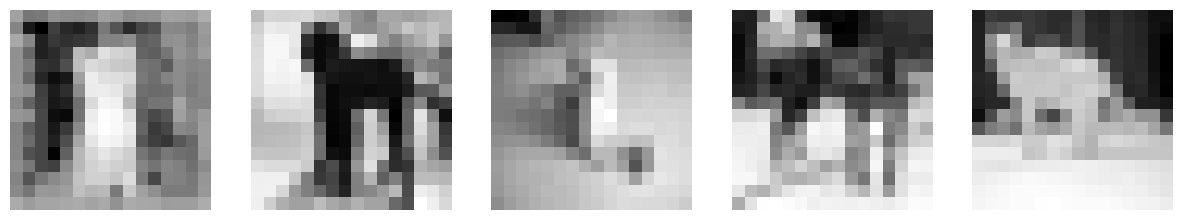

In [ ]:
#armado de los conjuntos de entrenamiento, validacion y testeo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=20000, random_state=42)

# Seleccionar 5 imágenes aleatorias de la lista
random_images = random.sample(X_train, 5)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Mostrar cada imagen
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    ax.axis('off')  # No mostrar los ejes

plt.show()


---

## **Clasificación**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/ej3.png?raw=true" alt="Descripción de la imagen">
</p>

---

### **Regresión Logística sin regularización**

Para poder implementar una regresión logística sin regularización, utilizamos `LogisticRegression` de la librería `sklearn`. 

Para indicar que la regresión sea sin regularización, podemos configurar el parametro `C` en un valor muy grande (mientras más grande es `C`, hay menor regularización). Tambien configuramos `solver = 'lbfgs'`, ya que es recomendado para una cantidad grande datos y ademas resuelve regularización L2 de manera eficiente. 

Para entrenar el modelo, utlizamos el método `fit` pasandole los datos de entrenamiento y los labels correspondientes.

Luego de entrenamos el modelo, realizamos las predicciones de los conjuntos de entrenamiento y de testeo utilizando el método `predict`.

Por último, una vez que tenemos las predicciones, pasamos a calcular el `accuaracy` o precisión de dichas predicciones. Esto se puede calcular como:

$$
\text{Accuaracy} = \frac{\text{Número de predicciones correctas}}{\text{Total de muestras}}
$$

In [ ]:
# Aplanar las imágenes (convertir 2D a 1D)
X_train_flat = np.array([img.flatten() for img in X_train])
X_test_flat = np.array([img.flatten() for img in X_test])

# Escalar los datos (normalización 0-1)
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

# Crear el modelo de regresión logística sin regularización
model = LogisticRegression(C=1e10, solver='lbfgs', max_iter=5000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Predecir las etiquetas de las muestras de entrenamiento
y_train_pred = model.predict(X_train_scaled)

# Predecir las etiquetas de las muestras de prueba
y_test_pred = model.predict(X_test_scaled)

# Calcular la precisión para entrenamiento y testeo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar los resultados
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


Precisión en el conjunto de entrenamiento: 0.5854
Precisión en el conjunto de prueba: 0.5586


### **Resultados**

| **Métrica**                  | **Valor**     |
|------------------------------|--------------|
| **Precisión en entrenamiento** | 58.54%       | 
| **Precisión en prueba**       | 55.86%       | 

Se puede observar que la precisión tanto en el conjunto de entrenamiento como en el de prueba está entre un 55-60%, lo que indica un rendimiento apenas superior a un modelo aleatorio (que tendría una precisión del 50%).

No podemos afirmar que haya overfitting, ya que las precisiones en ambos conjuntos son similares. Si hubiera sobreajuste, la precisión en el entrenamiento sería significativamente mayor que en la prueba. Sin embargo, el modelo no generaliza bien, ya que la precisión sigue siendo baja en ambos casos.

Conclusión: la regresión logística sin regularización, si bien es mejor que un modelo aleatorio, la precisión del modelo sigue siendo baja.

---

## **Cross-Entropy**

La **entropía cruzada** (cross-entropy) es la función de pérdida utilizada en regresión logística. Mide qué tan bien el modelo predice probabilidades para las clases correctas.

Se define como:

$$
H(p, q) = - \sum_{i} p_i \log q_i
$$

Donde:
- $ p_i $ es la distribución real de clases (valores 0 o 1 en clasificación binaria).
- $ q_i $ es la probabilidad predicha por el modelo.


En el caso de **regresión logística binaria**, si tenemos dos clases (0 y 1), la función de pérdida de **entropía cruzada** es:

$$
l = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Donde:
- $ N $ es el número total de muestras.
- $ y_i $ es la etiqueta real (0 o 1).
- $ \hat{y}_i $ es la probabilidad predicha de que la muestra pertenezca a la clase 1.

La entropía cruzada penaliza más fuertes las predicciones erróneas con alta confianza. Por ejemplo:

1. Si la etiqueta real es 1 y el modelo predice $\hat{y} = 0.99$, la pérdida es baja.
2. Si la etiqueta real es 1 y el modelo predice $\hat{y} = 0.01$, la pérdida es alta.

---

### **Implementación de la entropía cruzada**

Para la implementación de la entropía cruzada vamos a definir una función que reciba como parametros `y_true` que corresponde a las etiquetas reales del conjunto al que se le quiere calcular la entropía cruzada; y también recibe como parámetro `log_proba` que es el resultado de aplicar `predict_log_proba()` sobre un conjunto X. 

Hay que tener en cuenta que `predict_log_proba` nos devuelve una matriz de N filas y 2 columnas (en este caso son 2 ya que estamos analizando clasificación binaria), donde los valores de la primer columna corresponden al logaritmo de la probabilidad de que la clase sea 0, y la segunda columna corresponde al logaritmo de la probabilidad de que la clase sea 1 para cada valor del conjunto X. También se debe tener en cuenta que algunos valores de `predict_log_proba` pueden ser `-inf`, esto pasa cuando alguna probabilidad es 0, y como $log(0)$ no está definida, computacionalmente se le asigna `-inf`

Con `log_q = log_proba[np.arange(len(y_true)), y_true]`, nos quedamos con el logaritmo de la probabilidad correspondiente a la clase correcta para cada valor del conjunto X. 

Luego, para aplicar la condición de continuidad que $p = q = 0$, entonces $p \ log(q) = 0$, buscamos los valores donde `log_q` es `-inf` y lo reemplazamos por 0.

Por último devolvemos `-np.mean(log_q)` que nos devuelve la esperanza de $log(q)$ cambiado de signo. 

In [ ]:
# Función para calcular la cross-entropy
def cross_entropy(y_true, log_proba):
    """
    Calcula la cross-entropy dada la salida de predict_log_proba,
    asegurando continuidad cuando p = q = 0.

    Parámetros:
    y_true: etiquetas verdaderas (0 o 1)
    log_proba: logaritmo de las probabilidades predichas para cada clase
    epsilon: pequeño valor para evitar log(0)

    Retorna:
    Valor de cross-entropy promedio
    """
    # Extraer las probabilidades logarítmicas correspondientes a las clases correctas
    log_q = log_proba[np.arange(len(y_true)), y_true]

    # Aplicar la condición de continuidad: si p = q = 0, entonces p log(q) = 0
    log_q = np.where(np.isneginf(log_q), 0, log_q)  # Si log_q es -inf (q=0), convertirlo en 0

    # Calcular la cross-entropy
    return -np.mean(log_q)


# Asegurar que los datos estén escalados entre 0 y 1
X_train_scaled = np.array(X_train_flat) / 255.0
X_test_scaled = np.array(X_test_flat) / 255.0

# Crear el modelo de regresión logística sin regularización
model = LogisticRegression(C=1e10, solver='lbfgs', max_iter=5000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Predecir las probabilidades logarítmicas
log_proba_train = model.predict_log_proba(X_train_scaled)
log_proba_test = model.predict_log_proba(X_test_scaled)

# Calcular la cross-entropy para entrenamiento y testeo
train_cross_entropy = cross_entropy(y_train, log_proba_train)
test_cross_entropy = cross_entropy(y_test, log_proba_test)


# Mostrar los resultados
print(f"Cross-entropy en el conjunto de entrenamiento: {train_cross_entropy:.4f}")
print(f"Cross-entropy en el conjunto de prueba: {test_cross_entropy:.4f}")

Cross-entropy en el conjunto de entrenamiento: 0.6725
Cross-entropy en el conjunto de prueba: 0.6830


### **Resultados de la entropía cruzada**  

| **Métrica**                        | **Valor**  |
|------------------------------------|------------|
| **Cross-entropy en entrenamiento** | 0.6725     |
| **Cross-entropy en prueba**        | 0.6830     |

La entropía cruzada mide qué tan bien las probabilidades predichas por el modelo se alinean con las etiquetas reales. Un valor menor indica mejores predicciones, mientras que valores más altos sugieren que el modelo tiene más incertidumbre o comete más errores.

En nuestro caso, los valores dados son relativamente altos, lo cual nos indica que el modelo está lejos de ser ideal, ya que aún presenta una alta incertidumbre en sus predicciones.

---

### **Predicción del consejero con el modelo sin regularización**

Para obtener la imágen del consejero que se encuentra en el repositorio de github de la materia, utilizamos el método `get` de la librería `request` especificando la URL de la imágen. 

Una vez descargada la imágen, realizamos el mismo preprocesamiento aplicado anteriormente con el dataset, es decir, convertimos la imágen a escala de grises y redimensionamos la imágen a un tamaño `target_size` (16x16). 

Luego, con el método `predict`, obtenemos la predicción del modelo de regresión logística sin regularización para la imágen del consejero.

Imagen descargada con éxito.


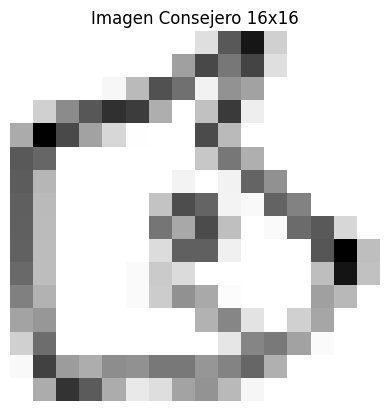

Clase predicha: 1


In [12]:
# URL de la imagen en GitHub (reemplázala con la URL real)
consejero_url = "https://github.com/mvera1412/TA136-TB056-TB057-8625/blob/main/data/consejero.png?raw=true"

# Descargar la imagen
response = requests.get(consejero_url)
if response.status_code == 200:
    image_consejero = Image.open(BytesIO(response.content))
    print("Imagen descargada con éxito.")
else:
    print("Error al descargar la imagen.")

# Convertir a escala de grises
image_consejero = image_consejero.convert("L")

# Redimensionar a 16x16
image_consejero_resized = image_consejero.resize(target_size)

# Mostrar la imagen sin ejes
plt.imshow(image_consejero_resized, cmap='gray')
plt.title("Imagen Consejero 16x16")
plt.axis('off')  # Desactivar los ejes
plt.show()

#escalo la imagen
img_consejero_scaled = np.array(image_consejero_resized).flatten() / 255.0

# Clasificar la imagen utilizando el modelo entrenado
predicted_class = model.predict([img_consejero_scaled])

print(f"Clase predicha: {predicted_class[0]}")

Podemos observar que el resultado de la predicción del modelo de regresión logística sin regularización es un $1$, es decir, el modelo predice que el consejero es un perro.

---

## **Regularización**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/ej4.png?raw=true" alt="Descripción de la imagen">
</p>

---

La regresión logística con regularización se define agregando un término de penalización a la función de pérdida de entropía cruzada para evitar el sobreajuste, por lo que la expresión con regularización L2 queda de la siguiente forma:

$$
l = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda ||w||^2
$$

Donde:
- $ N $ es el número total de muestras.
- $ y_i $ es la etiqueta real (0 o 1).
- $ \hat{y}_i $ es la probabilidad predicha de que la muestra pertenezca a la clase 1.
- $\lambda$ es el coeficiente que controla la penalización de la regularización
- $||w||^2$ es el cuadrado de la norma L2 de $w$.


Para poder implementar ésto, `LogisticRegression` define un parámetro `C` que es la inversa del coeficiente de penalización, por lo tanto $\lambda = \frac{1}{C}$. De esta forma si queremos mayor penalización, debemos definir un valor de `C` pequeño, y si queremos que el coeficiente de penalización no influya demasiado, debemos definir un valor de `C` alto.

El enunciado nos pide utilizar un mapa polinómico de orden 2, para ello utilizamos `PolynomialFeatures` de la librería `sklearn` con `degree=2`. 

Luego obtenemos el mapa polinómico de los conjuntos de entrenamiento y testeo con `fit_transform`. 

Para el modelo de regresión logística sin regularización definimos el parámetro `C = 1e10` (valor alto para evitar el termino de penalización).

Por otro lado, para el modelo de regresión logística con regularización definimos el parámetro `C = 1`.

Luego entrenamos los modelos con y sin regularización utilizando el nuevo dataset obtenido luego de aplicar `PolynomialFeatures`. 

Realizamos las predicciones correspondientes y calculamos la precisión de ambos modelos sobre los conjuntos de entrenamiento y testeo.

### Curvas ROC

Para poder graficar las curvas ROC, primero obtenemos las probabilidades sobre el conjunto de testeo de ambos modelos utilizando `predict_proba`, y nos quedamos con las probabilidades de la clase positiva. 

Luego, utilizando `roc_curve` de la librería `sklearn`, pasandole como argumento, las etiquetas verdaderas y las probabilidades de que la clase sea positiva, obtenemos la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR).

Esto lo realizamos para ambos modelos y luego graficamos las curvas ROC de ambos modelos, junto con la curva ROC del modelo aleatorio.




Precisión sin regularización - Entrenamiento: 0.9958
Precisión sin regularización - Testeo: 0.6198
Precisión con regularización - Entrenamiento: 0.8815
Precisión con regularización - Testeo: 0.6557


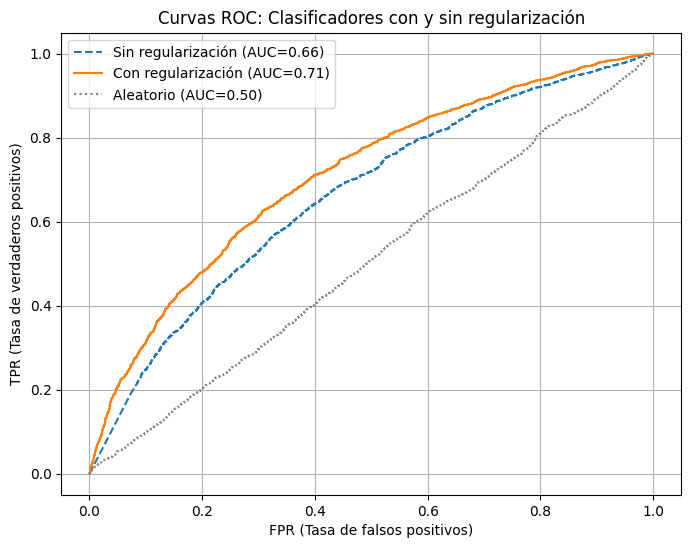

In [ ]:
# Crear el mapa polinómico de orden 2
poly = PolynomialFeatures(degree=2)

# Transformar los datos originales a su versión polinómica
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entrenar la regresión logística SIN regularización (C grande)
#model_no_reg = LogisticRegression(C=1e10, solver='lbfgs', max_iter=2000)
model_no_reg = LogisticRegression(C=1e10, solver='lbfgs', max_iter=5000)
model_no_reg.fit(X_train_poly, y_train)

# Entrenar la regresión logística CON regularización (C pequeño)
model_reg = LogisticRegression(C=1, solver='lbfgs', max_iter=5000)
model_reg.fit(X_train_poly, y_train)

# Predicciones de cada modelo
y_train_pred_no_reg = model_no_reg.predict(X_train_poly)
y_test_pred_no_reg = model_no_reg.predict(X_test_poly)

y_train_pred_reg = model_reg.predict(X_train_poly)
y_test_pred_reg = model_reg.predict(X_test_poly)

# Calcular precisión en entrenamiento y testeo
train_acc_no_reg = accuracy_score(y_train, y_train_pred_no_reg)
test_acc_no_reg = accuracy_score(y_test, y_test_pred_no_reg)

train_acc_reg = accuracy_score(y_train, y_train_pred_reg)
test_acc_reg = accuracy_score(y_test, y_test_pred_reg)

print(f"Precisión sin regularización - Entrenamiento: {train_acc_no_reg:.4f}")
print(f"Precisión sin regularización - Testeo: {test_acc_no_reg:.4f}")

print(f"Precisión con regularización - Entrenamiento: {train_acc_reg:.4f}")
print(f"Precisión con regularización - Testeo: {test_acc_reg:.4f}")

# Obtener probabilidades de la clase positiva para la curva ROC
y_scores_no_reg = model_no_reg.predict_proba(X_test_poly)[:, 1]
y_scores_reg = model_reg.predict_proba(X_test_poly)[:, 1]

# Calcular la curva ROC
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test, y_scores_no_reg)
fpr_reg, tpr_reg, _ = roc_curve(y_test, y_scores_reg)
random_fpr, random_tpr, _ = roc_curve(y_test, np.random.rand(len(y_test)))

# Calcular el área bajo la curva (AUC)
auc_no_reg = auc(fpr_no_reg, tpr_no_reg)
auc_reg = auc(fpr_reg, tpr_reg)
auc_random = auc(random_fpr, random_tpr)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_no_reg, tpr_no_reg, label=f"Sin regularización (AUC={auc_no_reg:.2f})", linestyle='--')
plt.plot(fpr_reg, tpr_reg, label=f"Con regularización (AUC={auc_reg:.2f})", linestyle='-')
plt.plot(random_fpr, random_tpr, label=f"Aleatorio (AUC={auc_random:.2f})", linestyle='dotted', color='gray')

plt.xlabel("FPR (Tasa de falsos positivos)")
plt.ylabel("TPR (Tasa de verdaderos positivos)")
plt.title("Curvas ROC: Clasificadores con y sin regularización")
plt.legend()
plt.grid()
plt.show()


### **Resultados de la regresión logística con y sin regularización**

| **Modelo**               | **Precisión en Entrenamiento** | **Precisión en Testeo** |
|--------------------------|-----------------------------|------------------------|
| **Sin regularización**   | 99.58%                      | 61.98%                 |
| **Con regularización**   | 88.15%                      | 65.57%                 |

### **Conclusiones**

En el caso de la regresión logística sin regularización, la precisión es del **99% en el conjunto de entrenamiento** y **62% en el conjunto de testeo**. Esto indica un **sobreajuste**, ya que el modelo memoriza los datos de entrenamiento pero tiene dificultades para generalizar con datos nuevos.

Por otro lado, en la regresión logística con regularización, la precisión en el conjunto de entrenamiento **disminuye a 88%**, mientras que la precisión en el conjunto de testeo **aumenta a 65%**. Esto muestra que la regularización **reduce el sobreajuste** y mejora la capacidad de generalización del modelo.

En la imagen, las **curvas ROC** muestran que ambos modelos son mejores que un clasificador aleatorio (AUC = 0.50). Además, el modelo con regularización tiene un **AUC mayor (0.71 vs. 0.66)**, lo que confirma que su desempeño es superior.

Por último, la aplicación de un **mapa polinómico de orden 2** mejoró los resultados de ambos modelos en comparación con la regresión logística sin transformación polinómica. Sin embargo, estas mejoras vienen **a costa de un mayor costo computacional**, lo que puede ser un factor a considerar dependiendo del problema y los recursos disponibles.
